## Importing Data and Libraries

In [27]:
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.metrics import roc_curve, auc
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier
from sklearn.svm import SVC
from sklearn.model_selection import GridSearchCV
from sklearn.metrics import accuracy_score, recall_score, precision_score, f1_score, cohen_kappa_score, make_scorer
from sklearn.svm import SVC

# svc_model = SVC(probability=True)


In [28]:
Train = pd.read_csv('dataTrain.csv')
Test = pd.read_csv('dataTest.csv')

X_train = Train.drop('STATUS', axis=1)
y_train = Train['STATUS']

X_test = Test.drop('STATUS', axis=1)
y_test = Test['STATUS']

In [29]:
X_train = X_train.to_numpy()
X_test = X_test.to_numpy()
y_train = y_train.array
y_test = y_test.array

## Building the model

### Logistic Regression

In [30]:
# Define a custom scorer dictionary
scoring = {
    'accuracy': make_scorer(accuracy_score),
    'recall': make_scorer(recall_score),
    'precision': make_scorer(precision_score),
    'f1': make_scorer(f1_score),
    'kappa': make_scorer(cohen_kappa_score)
}

In [31]:
def train_logistic_regression(X, y):
    param_grid = [
        {"penalty": ["l2"], "solver": ["lbfgs", "saga"], "C": [0.01, 0.1, 1, 10, 100], "max_iter": [100, 500, 1000]},
        {"penalty": ["l1", "l2"], "solver": ["liblinear"], "C": [0.01, 0.1, 1, 10, 100], "max_iter": [100, 500, 1000]},
        {"penalty": ["elasticnet"], "solver": ["saga"], "C": [0.01, 0.1, 1, 10, 100], "max_iter": [100, 500, 1000], "l1_ratio": [0, 0.5, 1]}
    ]
    model = LogisticRegression()
    
    grid_search = GridSearchCV(
        estimator=model,
        param_grid=param_grid,
        scoring=scoring,
        refit='accuracy',
        n_jobs=-1,
        cv=5,
        verbose=2
    )
    
    grid_search.fit(X, y)
    
    print("Best Parameters:", grid_search.best_params_)
    print("Best Accuracy:", grid_search.cv_results_['mean_test_accuracy'][grid_search.best_index_])
    print("Best Recall:", grid_search.cv_results_['mean_test_recall'][grid_search.best_index_])
    print("Best Precision:", grid_search.cv_results_['mean_test_precision'][grid_search.best_index_])
    print("Best F1-Score:", grid_search.cv_results_['mean_test_f1'][grid_search.best_index_])
    print("Best Kappa Score:", grid_search.cv_results_['mean_test_kappa'][grid_search.best_index_])

    return grid_search.best_estimator_

### RFC

In [32]:
def train_random_forest(X, y):
    param_grid = {
        "n_estimators": [100, 200, 500],
        "max_depth": [None, 10, 20, 50],
        "min_samples_split": [2, 5, 10],
        "min_samples_leaf": [1, 2, 4],
        "bootstrap": [True, False]
    }
    model = RandomForestClassifier(random_state=1)
    
    grid_search = GridSearchCV(
        estimator=model,
        param_grid=param_grid,
        scoring=scoring,
        refit='accuracy',
        n_jobs=-1,
        cv=5,
        verbose=2
    )
    
    grid_search.fit(X, y)
    
    print("Best Parameters:", grid_search.best_params_)
    print("Best Accuracy:", grid_search.cv_results_['mean_test_accuracy'][grid_search.best_index_])
    print("Best Recall:", grid_search.cv_results_['mean_test_recall'][grid_search.best_index_])
    print("Best Precision:", grid_search.cv_results_['mean_test_precision'][grid_search.best_index_])
    print("Best F1-Score:", grid_search.cv_results_['mean_test_f1'][grid_search.best_index_])
    print("Best Kappa Score:", grid_search.cv_results_['mean_test_kappa'][grid_search.best_index_])

    return grid_search.best_estimator_


SVM

In [33]:
def train_svm(X, y):
    param_grid = {
        "C": [0.1, 1, 10, 100],
        "gamma": ["scale", "auto"],
        "kernel": ["rbf", "linear", "poly"],
        "degree": [2, 3, 4]  # Relevant only for 'poly' kernel
    }
    model = SVC(class_weight="balanced", random_state=1)
    
    grid_search = GridSearchCV(
        estimator=model,
        param_grid=param_grid,
        scoring=scoring,
        refit='accuracy',
        n_jobs=-1,
        cv=5,
        verbose=2
    )
    
    grid_search.fit(X, y)
    
    print("Best Parameters:", grid_search.best_params_)
    print("Best Accuracy:", grid_search.cv_results_['mean_test_accuracy'][grid_search.best_index_])
    print("Best Recall:", grid_search.cv_results_['mean_test_recall'][grid_search.best_index_])
    print("Best Precision:", grid_search.cv_results_['mean_test_precision'][grid_search.best_index_])
    print("Best F1-Score:", grid_search.cv_results_['mean_test_f1'][grid_search.best_index_])
    print("Best Kappa Score:", grid_search.cv_results_['mean_test_kappa'][grid_search.best_index_])

    return grid_search.best_estimator_

Fitting 5 folds for each of 105 candidates, totalling 525 fits
Best Parameters: {'C': 0.1, 'max_iter': 100, 'penalty': 'l1', 'solver': 'liblinear'}
Best Accuracy: 0.8747219750118468
Best Recall: 0.8548058151196045
Best Precision: 0.8880228623660578
Best F1-Score: 0.8710791246076791
Best Kappa Score: 0.7493291885307058
Fitting 5 folds for each of 216 candidates, totalling 1080 fits
Best Parameters: {'bootstrap': False, 'max_depth': None, 'min_samples_leaf': 1, 'min_samples_split': 5, 'n_estimators': 100}
Best Accuracy: 0.9636631826056359
Best Recall: 0.9613487154068394
Best Precision: 0.9651407525887811
Best F1-Score: 0.9632329980993092
Best Kappa Score: 0.927316723780093
Fitting 5 folds for each of 72 candidates, totalling 360 fits
Best Parameters: {'C': 100, 'degree': 2, 'gamma': 'scale', 'kernel': 'rbf'}
Best Accuracy: 0.9589332840196793
Best Recall: 0.9584542546090157
Best Precision: 0.9586245567061912
Best F1-Score: 0.9585264919373679
Best Kappa Score: 0.9178587578458008


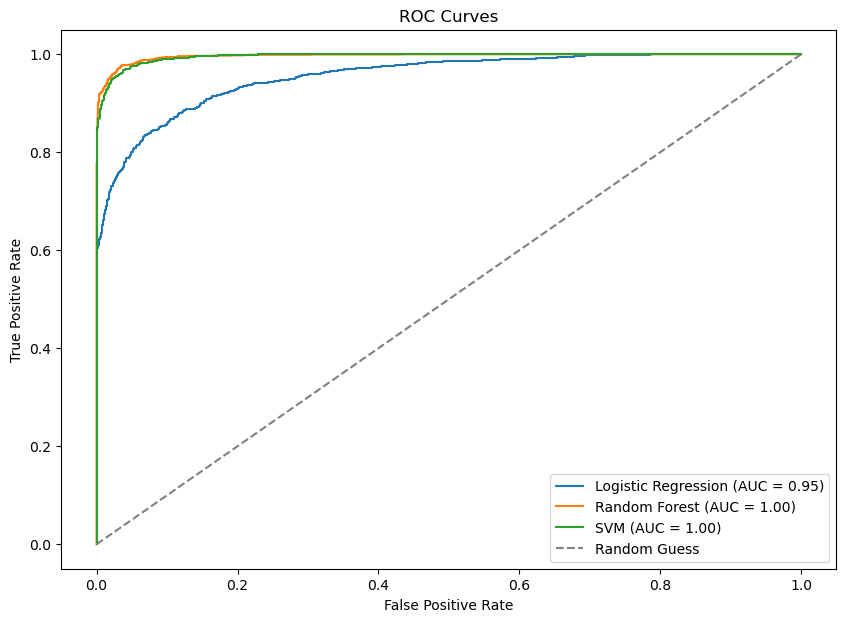

In [34]:
def plot_roc_curves(models, X_test, y_test):
    plt.figure(figsize=(10, 7))
    for name, model in models.items():
        if hasattr(model, "predict_proba"):  # For models supporting predict_proba
            y_score = model.predict_proba(X_test)[:, 1]
        else:  # For SVMs, use decision_function
            y_score = model.decision_function(X_test)
        fpr, tpr, _ = roc_curve(y_test, y_score)
        roc_auc = auc(fpr, tpr)
        plt.plot(fpr, tpr, label=f"{name} (AUC = {roc_auc:.2f})")
    plt.plot([0, 1], [0, 1], color="gray", linestyle="--", label="Random Guess")
    plt.xlabel("False Positive Rate")
    plt.ylabel("True Positive Rate")
    plt.title("ROC Curves")
    plt.legend(loc="lower right")
    plt.show()


models = {
    "Logistic Regression": train_logistic_regression(X_train, y_train),
    "Random Forest": train_random_forest(X_train, y_train),
    "SVM": train_svm(X_train, y_train),
}

plot_roc_curves(models, X_test, y_test)
